# Foot Locker Candidate Questions - Python

**Candidate Name:** *Michael Kareev

**Date Completed:** *11/19/2018*

Congratulations on making it to this stage of the interview process!  For the next step of your candidacy, you will be asked to solve five unique problems; each one focuses on a distinct data science skill such as data access, data transformation, hypothesis testing, model evaluation, and lastly, you will be asked to interpret a report and make a recommendation.  You are free to use whatever languages and tools you choose for this assignment, but all code and derived data must be included in your final submission. Document formats such as `.ipynb`, `.rmd`, `.html`, and `.docx` are acceptable for submission. 

We are going to try and run your code, so if it references obscure libraries, please indicate this as well as how to locate/install them.  You need to be sure you do what the core task indicates; but, you should feel free to use novel and ingenious approaches. We do not want you to spend money for any API usage or external service; the project is expected to be completed within the free tier of any service. Based on the feedback from other candidates we also expect that the challenge should *not take more than two hours* to complete.

An evaluation rubric is not provided, but some of the things we will look at are:

1. **Completeness** and **correctness** of the project and codebase.
2. **Robustness** and **clarity** of the documentation included with the submission 
3. **Language selection** and **library dependency** appropriateness.
4. **Sophistication** and **ingenuity** in thinking and approach.

Each question also contains a bonus question at the end; this part is entirely optional, and a few sentence summary is sufficient.  

*Hint:* Clarity means articulating the approach and results cleanly and concisely.  *Overly verbose code and responses can be detrimental to your score*.

When you have completed the challenge, email your results to the email address you received this packet from.

>**Notice of Confidentiality:** This document, scenario, and data are proprietary to Foot Locker, Inc. And cannot be copied or distributed without the expressed written permission by Foot Locker, Inc. Failure to adhere to this notice of confidentiality will result in the immediate termination of the candidate's application and could result in legal action.

## Question One: Data Access

An often encountered step to data pre-processing usually involves querying data that exists within a relational database system. Typically such data may be transactional in nature, and as a result, it is optimized for a relational data model. While this format is critical for performance, efficient storage, and quick updates, it is often not suitable for data science work. In this next question, you will be asked to access data from a fictitious relational database and perform query operations to get it into a suitable format for analysis. The required output for this question is the correct SQL code and query results, you may use any dialect of SQL you wish, but submissions in any other language will be considered incorrect.

You have been granted access to a database that contains two tables; `Order_Detail` and `Product_Detail` that are stored in a relational format.  `Order_Detail` contains transactional information and possesses the following schema:

#### Table Order_Detail Schema

> **invoice_id:** The unique id for each transaction.
>
> **invoice_line:** A unique id for each item sold with each transaction (ie, multiple items can be purchased with each invoice.)
>
> **store_id:** The store where transaction took place.
>
> **time_stamp:** The date of the purchase.
>
> **product:** The unique id for the product sold within the transaction (every product sold has a unique product id.)
>
> **units:** The number of the products sold with the transaction (ie, you could purchase 2 of the same item.)
>
> **sales:** The gross sales for the item sold.
>
> **cogs:** The cost of the item sold (i.e. not the cost to the customer, but the cost to the business for the product.)

| invoice_id | invoice_line | store_id | time_stamp | product | units | sales  | cogs  | 
|------------|--------------|----------|------------|---------|-------|--------|-------| 
| 10000001   | 31215        | 3        | 9/3/17     | 3000    | 1     | 99.99  | 58.00 | 
| 10000001   | 31216        | 3        | 9/3/17     | 3354H   | 3     | 32.99  | 18.00 | 
| 10000002   | 91455        | 1        | 9/5/17     | 1234    | 2     | 24.99  | 20.00 | 
| 10000003   | 59943        | 2        | 9/5/17     | 3000    | 1     | 19.99  | 14.99 | 
| 10000004   | 95027        | 2        | 9/5/17     | 18518   | 1     | 9.99   | 3.00  | 
| 10000005   | 73994        | 2        | 9/5/17     | 12HA12  | 15    | 3.99   | 1.99  | 
| 10000006   | 98464        | 1        | 10/1/17    | wh30000 | 1     | 199.99 | 75.00 | 


#### Table Product_Detail Schema
> **product:** The unique id for the product sold within the transaction (every product sold has a unique product id.)
>
> **cat_name:** The listed name for a given product category.
>
> **key_internal:** No documentation exists for this field. 

| product | cat_name | key_internal|
|---------|--------- |  ---------  |
| 3000    | WidgetA  |  17375273   |
| 3354H   | WidgetB  |  15477787   |
| 1234    | WidgetC  |  97845235   |
| 18518   | WidgetD  |  47813334   |
| 12HA12  | WidgetD  |  48573988   |
| wh30000 | WidgetE  |  00000000   |

Your task is to construct a single SQL query that returns the following results:

> Summarized total sales, total quantity sold, and total profit (which can be calculated as total sales less cogs) by the week number, store id, product category name.  It is important to note that in this business, the week begins on a *Tuesday*.  

*Hint:*  The week number is the week portion of a date value, from 0 to 53. 

*Bonus Question:* How would you use Python to access this data and perform these operations?

The following SQL code has been provided if you choose to create these tables in a test database.

```sql
--clean up existing tables
DROP TABLE IF EXISTS Order_Detail;
DROP TABLE IF EXISTS Product_Detail;

--create order table and populate records
CREATE TABLE IF NOT EXISTS Order_Detail (
    invoice_id INTEGER NOT NULL,
    invoice_line INTEGER NOT NULL,
    store_id INTEGER NOT NULL,
    time_stamp DATE NOT NULL,
    product VARCHAR(8) NOT NULL,
    units INTEGER NOT NULL,
    sales NUMERIC(7 , 2 ) NOT NULL,
    cogs NUMERIC(5 , 2 ) NOT NULL
);

INSERT INTO Order_Detail(invoice_id,invoice_line,store_id,time_stamp,product,units,sales,cogs) VALUES (10000001,31215,3,'2017/09/03','3000',1,99.99,58.00);
INSERT INTO Order_Detail(invoice_id,invoice_line,store_id,time_stamp,product,units,sales,cogs) VALUES (10000001,31216,3,'2017/09/03','3354H',3,32.99,18.00);
INSERT INTO Order_Detail(invoice_id,invoice_line,store_id,time_stamp,product,units,sales,cogs) VALUES (10000002,91455,1,'2017/09/05','1234',2,24.99,20.00);
INSERT INTO Order_Detail(invoice_id,invoice_line,store_id,time_stamp,product,units,sales,cogs) VALUES (10000003,59943,2,'2017/09/05','3000',1,19.99,14.99);
INSERT INTO Order_Detail(invoice_id,invoice_line,store_id,time_stamp,product,units,sales,cogs) VALUES (10000004,95027,2,'2017/09/05','18518',1,9.99,3.00);
INSERT INTO Order_Detail(invoice_id,invoice_line,store_id,time_stamp,product,units,sales,cogs) VALUES (10000005,73994,2,'2017/09/10','12HA12',15,3.99,1.99);
INSERT INTO Order_Detail(invoice_id,invoice_line,store_id,time_stamp,product,units,sales,cogs) VALUES (10000006,98464,1,'2017/10/01','wh30000',1,199.99,75.00);

--create product table and populate records
CREATE TABLE IF NOT EXISTS Product_Detail (
    product VARCHAR(8) NOT NULL,
    cat_name VARCHAR(8) NOT NULL,
    key_interal VARCHAR(8) NOT NULL
);

INSERT INTO Product_Detail(product,cat_name,key_interal) VALUES ('3000','WidgetA','17375273');
INSERT INTO Product_Detail(product,cat_name,key_interal) VALUES ('3354H','WidgetB','15477787');
INSERT INTO Product_Detail(product,cat_name,key_interal) VALUES ('1234','WidgetC','97845235');
INSERT INTO Product_Detail(product,cat_name,key_interal) VALUES ('18518','WidgetD','47813334');
INSERT INTO Product_Detail(product,cat_name,key_interal) VALUES ('12HA12','WidgetD','48573988');
INSERT INTO Product_Detail(product,cat_name,key_interal) VALUES ('wh30000','WidgetE','00000000');
```

In [1]:
#Answer to question one goes here
"""
Moving weeks' starting days in this query won't be very smart. You might want to have a separate table 
with the-astronomical-to-the-fiscal-calendar mapping. It will also solve a problem of gap years when every day after 
February moves more than one day forward. The access time should be const. 
That said, the code below excludes the week column but shows everything else requested. 
"""

In [ ]:
#SQL code goes here

In [ ]:
"""
In terms of how one can run SQL queries directly from here, it all depends on what server you run.
In the most general case, it should be something like:

import pyodbc 
cnxn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=server_name;"
                      "Database=db_name;"
                      "Trusted_Connection=yes;")


cursor = cnxn.cursor()
cursor.execute('SELECT * FROM Table')
"""

## Question Two: Data Transformation

Another common task is to take data that may not be in a usable format and 'wrangle' it into a better representation.  This next question will test your ability to clean and order data.

You have been presented with two dataframes: 

#### Dataframe A: Product Attributes
This dataframe contains two columns; the first one is a unique product ID represented by an integer, the second is a string containing a collection of attributes assigned to that product.  

| product | tags                 |
|---------|----------------------|
| 100     | chocolate, sprinkles |
| 101     | chocolate, filled    |
| 102     | glazed               |


#### Dataframe B: Purchase History
The second dataframe contains two columns as well; the first one is a string that contains a customer name, the second is an integer that contains a product number.  The product IDs from column two are the same as the product IDs from column one of dataframe A.

| customer | product |
|----------|---------|
| A        | 100     |
| A        | 101     |
| B        | 101     |
| C        | 100     |
| C        | 102     |
| B        | 101     |
| A        | 100     |
| C        | 102     |

You are asked to create a dataframe matching this format, where the contents of the cells represent the count of occurrences of product attribute by customer.  

| customer | chocolate | sprinkles | filled | glazed |
|----------|-----------|-----------|--------|--------|
| A        | ?         | ?         | ?      | ?      |
| B        | ?         | ?         | ?      | ?      |
| C        | ?         | ?         | ?      | ?      |


After you have completed your code, evaluate it for performance bottlenecks and describe how you would improve the code.  

*Bonus Question:* If the two starting tables were in a relational database or Hadoop cluster and each had a 100 million rows, how might your approach change?

In [2]:
import pandas as pd

tableA = [(100, 'chocolate, sprinkles'),
         (101, 'chocolate, filled'),
         (102, 'glazed')]
labels = ['product', 'tags']
dfA = pd.DataFrame.from_records(tableA, columns=labels)

tableB = [('A', 100),
           ('A', 101),
           ('B', 101),
           ('C', 100),
           ('C', 102),
           ('B', 101),
           ('A', 100),
           ('C', 102)]
labels = ['customer', 'product']
dfB = pd.DataFrame.from_records(tableB, columns=labels)

In [ ]:
#Answer to question two goes here
import pandas as pd

tableA = [(100, 'chocolate, sprinkles'),
         (101, 'chocolate, filled'),
         (102, 'glazed')]
labels = ['product', 'tags']
dfA = pd.DataFrame.from_records(tableA, columns=labels)

tableB = [('A', 100),
           ('A', 101),
           ('B', 101),
           ('C', 100),
           ('C', 102),
           ('B', 101),
           ('A', 100),
           ('C', 102)]
labels = ['customer', 'product']
dfB = pd.DataFrame.from_records(tableB, columns=labels)

# split tags into multiple columns
dfA = pd.concat([dfA['product'], dfA['tags'].str.split(', ', expand=True)], axis=1)

# convert multiple columns to records using pd.melt
dfA = pd.melt(dfA, 'product', var_name='Col', value_name='tags').reset_index().drop(columns=['index', 'Col'])

# merge together frames A & B
merged1 = dfB.merge(dfA, on='product')

# pivot data
pd.pivot_table(merged1, index='customer', columns='tags', aggfunc='count', fill_value=0)

## Question Three: Hypothesis Testing
This question will test your statistical and reasoning abilities.  You have been asked to analyze the results of a randomized, controlled experiment on a fictitious website and provide a recommendation.  For this experiment, each visitor to the site is randomly exposed to one of four different product images; visitors are then tracked to see which ones make a purchase or not.  Based on the data provided, which version of the image should be selected to be presented to all visitors and why?

| image | visitors | purchases 
|----------|-----------|----------|
| A        | 21        | 3        | 
| B        | 180       | 30       | 
| C        | 250       | 50       | 
| D        | 100       | 15       | 

*Bonus Question:* How would your analysis change if the visitors and purchase counts numbered in the millions? 

In [8]:
#Answer to question three goes here
"""Certain assumptions are required for answering this question.
1) Define a KPI to measure. In this case, it will be a conversion rate calculated as purchases divided by visitors
2) It is not clear whether the provided numbers are for the whole population or are a sample proportion.
If former, it's definitely not enough data to sample sample means. It can be probably handled by bootstrap, but it's a
different story. If latter, we can work with it
3) We make assumption about normality of the distribution, homoscedasticity, independency of observations
4) That said, comparing more than two proportions is tricky in Python but can be easily implemented in R.

"""

#### Here comes the R code
purchases <- c(3,30,50,15)

visitors <- c(21, 180, 250, 100)

pp <- prop.test(purchases, visitors, conf.level = 0.95)

The output is:

data:  purchases out of visitors

X-squared = 1.6991, df = 3, p-value = 0.6371

alternative hypothesis: two.sided

sample estimates:
   prop 1    prop 2    prop 3    prop 4 
   
0.1428571 0.1666667 0.2000000 0.1500000

In [ ]:
"""
As you can see, the p-value doesn't allow us to make any conclusion about the provided dataset. 
If we had more data, "millions of visitors and purchase metrics," we could sample sample means, take advantage of the centra 
limit theorem and an ANOVA test. Alternatively, one can compare images one to another to double check his or her work:
A-B, A-C, A-D, B-C, B-D, C-D
Using A-B as an example: 
H0: Pa-Pb = 0
H1: Pa-Pb <> 0
Mean is Pa-Pb
sigma squared is [Pa*(1-Pa)]/Na - [Pb*(1-Pb)]/Nb
Solve for any confidence interval you want, reject or fail to reject H0, etc.
"""

## Question Four: Forecasting

For this question, you will be provided with data related to the count of website sessions by day for the past one hundred days.  You are now asked to create a forecast for the next sixty days using this data.  

In [6]:
sessionData = {'date': ["1/1/17","1/2/17","1/3/17","1/4/17","1/5/17","1/6/17","1/7/17","1/8/17","1/9/17","1/10/17",
"1/11/17","1/12/17","1/13/17","1/14/17","1/15/17","1/16/17","1/17/17","1/18/17","1/19/17","1/20/17",
"1/21/17","1/22/17","1/23/17","1/24/17","1/25/17","1/26/17","1/27/17","1/28/17","1/29/17","1/30/17",
"1/31/17","2/1/17","2/2/17","2/3/17","2/4/17","2/5/17","2/6/17","2/7/17","2/8/17","2/9/17","2/10/17",
"2/11/17","2/12/17","2/13/17","2/14/17","2/15/17","2/16/17","2/17/17","2/18/17","2/19/17","2/20/17",
"2/21/17","2/22/17","2/23/17","2/24/17","2/25/17","2/26/17","2/27/17","2/28/17","3/1/17","3/2/17","3/3/17",
"3/4/17","3/5/17","3/6/17","3/7/17","3/8/17","3/9/17","3/10/17","3/11/17","3/12/17","3/13/17","3/14/17",
"3/15/17","3/16/17","3/17/17","3/18/17","3/19/17","3/20/17","3/21/17","3/22/17","3/23/17","3/24/17",
"3/25/17","3/26/17","3/27/17","3/28/17","3/29/17","3/30/17","3/31/17","4/1/17","4/2/17","4/3/17",
"4/4/17","4/5/17","4/6/17","4/7/17","4/8/17","4/9/17","4/10/17"],
     'sessions': [88215,88484,87877,86780,84622,84607,84362,84912,84367,85991,86562,86761,85735,85386,84023,
83504,83795,85127,84971,86433,88094,89120,89184,90188,88540,88693,88031,86601,87447,87716,87042,87039,
86197,84339,85095,84764,83386,82621,83256,82997,84614,84480,86006,86436,85711,84115,83612,84812,85036,
84844,83745,85598,84914,85813,86634,86995,88356,87731,89142,90383,90686,93692,93800,93502,93786,92292,
91104,90193,90341,89314,88861,88853,89992,90246,90968,89741,88718,88335,87898,87666,88600,90110,90401,
90370,90346,89691,90643,90489,91289,89290,88668,89804,88989,89976,88239,87444,86951,85434,85655,
85105]}

sessionsDf = pd.DataFrame(data = sessionData)

In [4]:
#Answer to question four goes here
"""
Again, there is more than one method to do it.
First, we can try an autoregression model with different time lags. The mean squared error will show how accurately
the model is.
"""


In [4]:
from pandas import Series
from matplotlib import pyplot
import pandas as pd
from statsmodels.tsa.ar_model import AR
import sklearn
from sklearn.metrics import mean_squared_error
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
#import plotly

In [ ]:
#Making a timeseries out of the original dataset
ser = pd.Series(sessionsDf['sessions'].values, index = sessionsDf['date'])
ser.plot()
pyplot.show() #looking at how what we have so far
#No clear seasonality, trend or spikes around holidays.


def difference(dataset):  #difference between the current and the lagging day
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return np.array(diff)

def predict(coef, history):  # predictor
    yhat = coef[0]
    for i in range(1, len(coef)):
        yhat += coef[i] * history[-i]
    return yhat
#-----------------
X = difference(ser.values)  # creating a train and a test set in order to evaluate the accuracy of the model
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]
model = AR(train)
model_fit = model.fit(maxlag=15, disp=False) # maxlag allows to change how far back we autoregress
window = model_fit.k_ar
coef = model_fit.params
#------------------
history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
	yhat = predict(coef, history)
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error) #look at the error, try to change maxlog above to achieve a lower number here
#-------------------
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show() # how the predicted model performs vs. the actual numbers

In [10]:
"""
Overall, changing the maxlag parameter above doesn't help much. But we can try an out-of-the-box solution. Numerous issues have been reported with installing fbprophet on a Windows-run machine.
"""
import fbprophet
from fbprophet import Prophet

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Text(0.5, 1.0, 'Sessions')

<Figure size 1584x576 with 0 Axes>

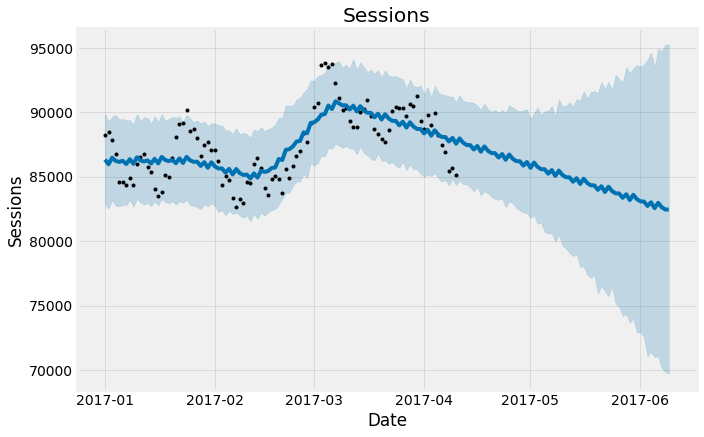

In [21]:
session_pr = sessionsDf # we will use a different dataset b/c Prophet requires columns be named in a certain name
session_pr.head()
session_pr.columns = ['ds','y']
ser_model = Prophet(interval_width=0.95, daily_seasonality=True)
#Prophet allows to play with daily, monthly and yearly seasonalities, if there is enough data.
#I've tried different combinations. Another one is shown below
ser_model.fit(session_pr)
ser_fct = ser_model.make_future_dataframe(periods=60,freq='d') # 60 days to forecast
ser_fct = ser_model.predict(ser_fct)
plt.figure(figsize=(22, 8))
plt.style.use('fivethirtyeight')
ser_model.plot(ser_fct,xlabel='Date', ylabel='Sessions')
plt.title('Sessions')

Text(0, 0.5, 'Sessions')

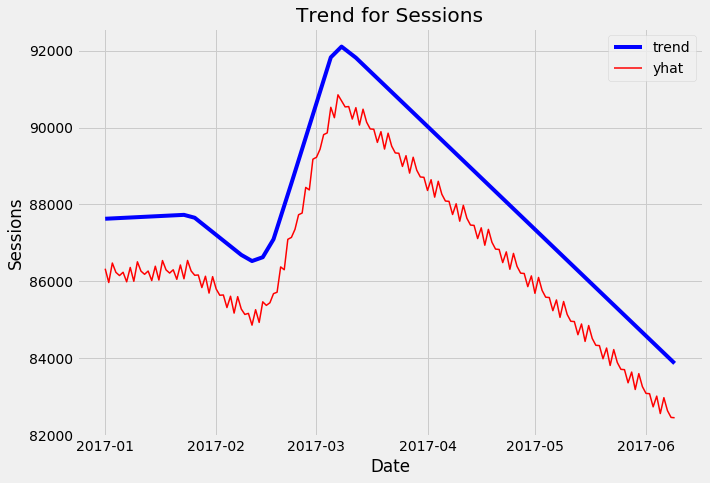

In [23]:
plt.figure(figsize=(10, 7))
plt.plot(ser_fct['ds'], ser_fct['trend'], 'b-')
plt.plot(ser_fct['ds'], ser_fct['yhat'], 'r-', linewidth = 1.5)
plt.title('Trend for Sessions')
plt.xlabel('Date')
plt.legend()
plt.ylabel('Sessions')

In [14]:
ser_fct.head() # everything sits in this dataframe

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,87996.113819,86330.237746,90632.047894,87996.113819,87996.113819,395.278655,395.278655,395.278655,145.490861,145.490861,145.490861,249.787794,249.787794,249.787794,0.0,0.0,0.0,88391.392474
1,2017-01-02,87962.050145,85122.081297,89994.393488,87962.050145,87962.050145,-416.146521,-416.146521,-416.146521,-119.805864,-119.805864,-119.805864,-296.340658,-296.340658,-296.340658,0.0,0.0,0.0,87545.903623
2,2017-01-03,87927.986471,85072.346993,89460.716238,87927.986471,87927.986471,-648.205982,-648.205982,-648.205982,173.878966,173.878966,173.878966,-822.084947,-822.084947,-822.084947,0.0,0.0,0.0,87279.780489
3,2017-01-04,87893.922796,84372.408463,88783.508394,87893.922796,87893.922796,-1340.492989,-1340.492989,-1340.492989,-27.081261,-27.081261,-27.081261,-1313.411728,-1313.411728,-1313.411728,0.0,0.0,0.0,86553.429807
4,2017-01-05,87859.859117,83549.774123,88212.171750,87859.859117,87859.859117,-1831.605709,-1831.605709,-1831.605709,-74.062249,-74.062249,-74.062249,-1757.543460,-1757.543460,-1757.543460,0.0,0.0,0.0,86028.253408


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0, 0.5, 'Sessions')

<Figure size 1584x576 with 0 Axes>

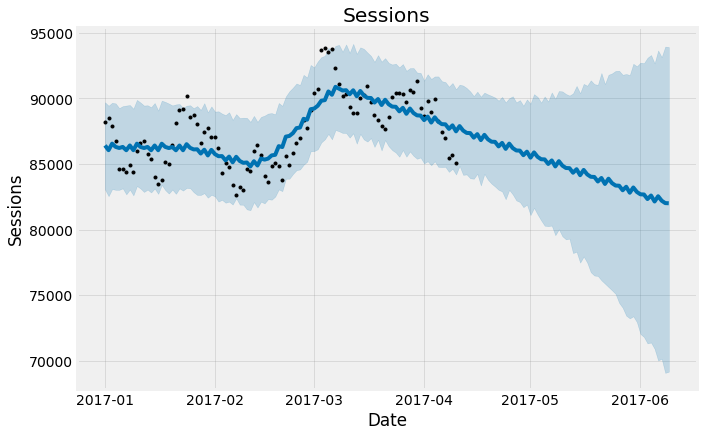

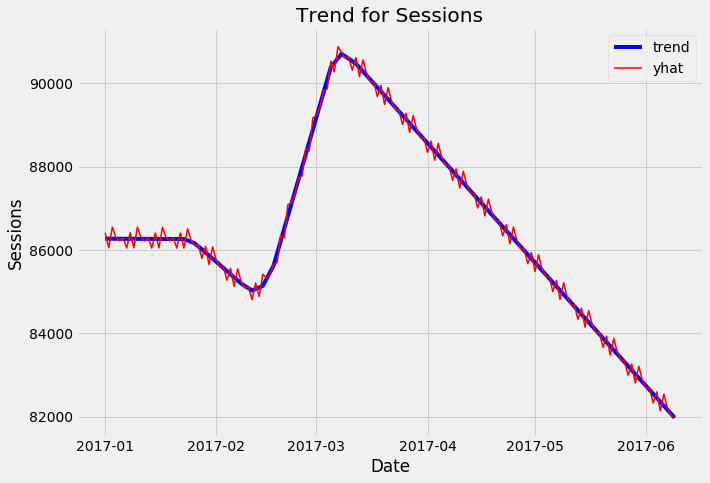

In [25]:
#With a different seasonality. I like this one better, but without more context, it's hard to judge
ser_model = Prophet(interval_width=0.95)
ser_model.fit(session_pr)

ser_fct = ser_model.make_future_dataframe(periods=60,freq='d')
ser_fct = ser_model.predict(ser_fct)

plt.figure(figsize=(22, 8))
plt.style.use('fivethirtyeight')
ser_model.plot(ser_fct,xlabel='Date', ylabel='Sessions')
plt.title('Sessions')

plt.figure(figsize=(10, 7))
plt.plot(ser_fct['ds'], ser_fct['trend'], 'b-')
plt.plot(ser_fct['ds'], ser_fct['yhat'], 'r-', linewidth = 1.5)
plt.title('Trend for Sessions')
plt.xlabel('Date')
plt.legend()
plt.ylabel('Sessions')

## Question Five: Data Analysis

The internet startup ShinyFancyObjects is looking to make its IPO in the next couple months.  Before doing so, its founders are presenting their company to potential investors and analysts with the goal of generating a higher company valuation before going public.  As a Data Scientist at one of these investment firms, you have been asked to help evaluate ShinyFancyObjects and determine if it would be a good investment.  

You have been provided two resources to help with your analysis; a company fact sheet provided by ShinyFancyObjects, and a table containing data about their customer history.  Using these two pieces of information, determine if this company would be a good long-term investment, and explain why or why not.


**ShinyFancyObjects Fact Sheet; The Hottest Startup Since Facebook**

* ShinyFancyObjects posses a customer file of nearly twenty thousand unique customers.  
* Since its launch in January 2016, ShinyFancyObjects is growing its customer base by 10%.
* There was a new feature release in November of 2016, which was a huge hit with our customers, resulting in a 46% increase in new customers from the prior month.  
* The company predicts it will more than double its customer base in the next year.  
* The January 2017 gain for new customers was a 120% improvement over of January of 2016. 
* Since January of 2016, ShinyFancyObjects has grown its customer base by 1,841%.
* ShinyFancyObjects boasts a customer retention rate of 58%.  

**Customer History**

This table shows new customers acquired by month, along with how many of those same customers remained active in the following months.  As an example, in January 2016, 1,098 new customers were acquired.  One month later, out of the initial 1,098, only 875 were still active, two months later, 800 were active, and so on.  Whereas in February of 2016, 1,358 new customers were acquired, of which 500 were still active six months after. 

| Cohort | Month 0 | Month 1  | Month 2 | Month 3 | Month 4 | Month 5 | Month 6 | Month 7 | Month 8 | Month 9 | Month 10 | Month 11 | Month 12 | Month 13 | 
|--------|---------|----------|---------|---------|---------|---------|---------|---------|---------|---------|----------|----------|----------|----------| 
| Jan-16 | 1098    | 875      | 800     | 765     | 552     | 421     | 403     | 382     | 367     | 341     | 295      | 244      | 201      | 185      | 
| Feb-16 | 1358    | 1019     | 996     | 826     | 713     | 524     | 500     | 495     | 389     | 301     | 257      | 178      | 133      |          | 
| Mar-16 | 1257    | 892      | 741     | 705     | 648     | 498     | 395     | 205     | 168     | 132     | 121      | 84       |          |          | 
| Apr-16 | 1587    | 1174     | 924     | 838     | 699     | 354     | 205     | 158     | 104     | 79      | 55       |          |          |          | 
| May-16 | 1758    | 1213     | 1000    | 751     | 605     | 305     | 165     | 111     | 90      | 65      |          |          |          |          | 
| Jun-16 | 1624    | 1137     | 954     | 754     | 403     | 248     | 205     | 165     | 100     |         |          |          |          |          | 
| Jul-16 | 1541    | 1002     | 874     | 621     | 322     | 201     | 168     | 105     |         |         |          |          |          |          | 
| Aug-16 | 868     | 521      | 499     | 400     | 158     | 118     | 75      |         |         |         |          |          |          |          | 
| Sep-16 | 1143    | 629      | 451     | 384     | 205     | 100     |         |         |         |         |          |          |          |          | 
| Oct-16 | 1253    | 639      | 338     | 255     | 117     |         |         |         |         |         |          |          |          |          | 
| Nov-16 | 1835    | 899      | 241     | 107     |         |         |         |         |         |         |          |          |          |          | 
| Dec-16 | 2155    | 862      | 205     |         |         |         |         |         |         |         |          |          |          |          | 
| Jan-17 | 2422    | 848      |         |         |         |         |         |         |         |         |          |          |          |          | 
| Feb-17 | 2531    |          |         |         |         |         |         |         |         |         |          |          |          |          | 

*Bonus Question:* What other data sources would be helpful in making your recommendation? 